# Bar graph

# Color information
For more information about color, please refer to: https://seaborn.pydata.org/tutorial/color_palettes.html

## Run this First

In [4]:
# import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import os
import copy

sns.set(font_scale=1.5)

data40 = pd.read_csv('data40.csv')
# data40 = data40.reset_index()
# # print(data40)
# print(data40.iloc[2:, 20:1])
total_data = data40.iloc[2:, 19:-1]
total_data = total_data.reset_index(drop=True)# reset index
total_data = total_data.astype('int32')
exp_result_data = total_data.iloc[:, 14:]

# print(exp_result_data)
# print(total_data)
# total_data = total_data.reset_index(drop=False) # reset index
total_data = total_data.astype(dtype='int64') # To int


# df = pd.melt(total_data, id_vars='')

total_data_np = total_data.values
total_data_np = total_data_np.astype(np.int64)

print(total_data_np)
print(total_data_np.shape)
list(total_data.columns)
def get_emo_num(name):
        if 'anger' in name.lower()  :
            return 0
        elif 'disgust' in name.lower() :
            return 5
        elif 'fear' in name.lower():
            return 1
        elif "happiness" in name.lower():
            return 2
        elif "sadness" in name.lower():
            return 3
        elif "surprise" in name.lower():
            return 4
        elif "neutral" in name.lower():
            return 6

[[4 3 5 ... 3 5 4]
 [2 4 5 ... 2 2 1]
 [3 1 4 ... 1 2 4]
 ...
 [1 1 5 ... 1 1 5]
 [1 1 6 ... 1 1 3]
 [1 1 6 ... 2 1 3]]
(40, 357)


# Average data

In [5]:
emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
form_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.split(', ')
cols = ['Prototype_aver_{}_{}'.format(j, x) for j in emo_names for x in range(1, 8)] 
cols2 = ['Res_aver_{}_{}'.format(j, x) for j in emo_names for x in range(1, 8)]
cur = []
for i in range(7):
    cur = cur + cols[7*i:7*i+7]
    cur = cur + cols2[7*i:7*i+7]
#     cur = [i for j in cur for i in j]
cols = cur
# print(cols)

# average the rating between namba normal and namba hot
# data structure: anger stimuli-> prototype
emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
# res = []
res = np.zeros([40, 98])
for i in range(40):
    # j means Stimulus from emo 1 - emo 7
    # k means 1-7
    for j in range(7):
        for k in range(7):
            # Prototype
            res[i, 2*7*j + k] = exp_result_data.iloc[i, [7*7*j + k, 7*7*j+7 + k]].sum() / 2
            # Res
            res[i, 2*7*j + 7 + k] = exp_result_data.iloc[i, [7*7*j+l*7 + k for l in range(2, 7)]].sum() / 5
# Prototype
print(res)

# print(np.array(res).shape)

# print(cols)
res = pd.DataFrame(res, columns=cols)
# print(res.head(50))
average_data = res.copy()

[[4.5 3.5 5.  ... 4.4 4.4 4.6]
 [3.5 2.5 3.  ... 2.  1.6 1.4]
 [5.  6.  2.  ... 1.  1.2 6.4]
 ...
 [3.  3.5 1.  ... 1.  1.  6.2]
 [4.5 1.  1.  ... 1.  1.4 4.4]
 [5.5 1.  1.  ... 1.2 1.  5. ]]


In [106]:
cols[i:i+7] + [1, 2]

['Res_aver_fear_5',
 'Res_aver_fear_6',
 'Res_aver_fear_7',
 'Prototype_aver_happiness_1',
 'Prototype_aver_happiness_2',
 'Prototype_aver_happiness_3',
 'Prototype_aver_happiness_4',
 1,
 2]

# Normalized type of data

In [6]:
emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
i = 0
df = []
flag = True
current_emo = emo_names[i]
print('current emo is ', current_emo)
exp_result_data_normalized = exp_result_data.copy()
# deal with total_data
# print(total_data.head)
# total_data.iloc[0, 0] = 1
# print(total_data.iloc[0, 0])
# print(exp_result_data)
print(exp_result_data_normalized.iloc[0, 0:7].values.astype(np.int64).sum())
for i in range(0, 40):
    for j in range(0, 49):
        cursum = exp_result_data_normalized.iloc[i, j*7:j*7+7].values.astype(np.int64).sum()
        for k in range(0, 7):
            temp = int(exp_result_data.iloc[i, j*7 + k]) / cursum
#             from decimal import Decimal
            exp_result_data_normalized.iloc[i, j*7+ k] = round(temp, 3)
# print(exp_result_data_normalized.head(1))

current emo is  anger
32


# Averaged normalized data

In [7]:
# average_data
average_data_norm = average_data.copy()
res = []

for i in range(40):
    # 96 values one line
    temp = []
    for j in range(14):
        cursum = average_data.iloc[i, j*7:j*7+7].values.astype(np.int64).sum()
#         cursum2 = average_data.iloc[i, 2*j*7+7:2*j*7+14].values.astype(np.int64).sum()
#         print(i, 2*j*7,2*j*7+7,2*j*7+14)
        for k in range(0, 7):
#             print(i, 2*j*7 + k)
            temp = int(average_data.iloc[i, j*7 + k]) / cursum

#             from decimal import Decimal
            average_data_norm.iloc[i, j*7+ k] = round(temp, 3)
print(average_data_norm.head(5))


   Prototype_aver_anger_1  Prototype_aver_anger_2  Prototype_aver_anger_3  \
0                   0.129                   0.097                   0.161   
1                   0.150                   0.100                   0.150   
2                   0.172                   0.207                   0.069   
3                   0.100                   0.100                   0.200   
4                   0.208                   0.167                   0.042   

   Prototype_aver_anger_4  Prototype_aver_anger_5  Prototype_aver_anger_6  \
0                   0.129                   0.161                   0.161   
1                   0.100                   0.200                   0.100   
2                   0.172                   0.172                   0.172   
3                   0.100                   0.100                   0.100   
4                   0.167                   0.167                   0.208   

   Prototype_aver_anger_7  Res_aver_anger_1  Res_aver_anger_2  \
0        

# 2 Columns - Selected

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


current emo is  anger
current emo is  disgust
current emo is  fear
current emo is  happiness
current emo is  sadness
current emo is  surprise
current emo is  neutral
   Stimulus  Aver. human ratings  emotion    Category
0     Anger                    4    anger   Prototype
1     Anger                    5    anger   Prototype
2     Anger                    5    anger   Prototype
3     Anger                    1    anger   Prototype
4     Anger                    6    anger   Prototype
..      ...                  ...      ...         ...
75  Neutral                    5  neutral  Our method
76  Neutral                    2  neutral  Our method
77  Neutral                    7  neutral  Our method
78  Neutral                    5  neutral  Our method
79  Neutral                    3  neutral  Our method

[560 rows x 4 columns]
error bar means  95% confidence interval


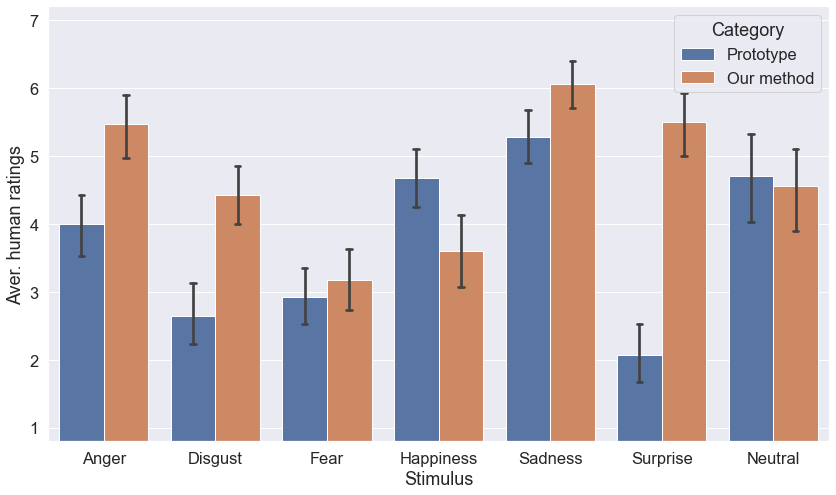

In [8]:
def multiple_analysis_with_fig(bar_group_num = 2):
#     emo_names = 'Anger*, Disgust*, Fear, Happiness*, Sadness*, Surprise*, Neutral'.lower().split(', ')
    emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
#     print(' Anger - 1 - 怒り,\n disgust 6 - 嫌悪,\n fear - 2 - 恐怖,\n happiness - 3 - 幸福, \n sadness - 4 - 悲しみ, \n surprise - 5 - 驚き,\n neutral - 7 - 中性')
#     print(total_data.iloc[0:2, :])
    df = []
    flag = True
    for i in range(7):
        current_emo = emo_names[i]
        print('current emo is ', current_emo)
        temp_data = total_data.iloc[:, 14+7*7*i : 14+7*7*i + 7*7].copy()
#        print(temp_data)
        temp_data_with_temp_rating = temp_data.iloc[:,[ get_emo_num(current_emo) + 7 * x for x in [0, 2]]] # This line defined which data we use to generate the bar plot
#         print(temp_data_with_temp_rating.head())
        if flag:
#             print(type(df))
            df = pd.melt(temp_data_with_temp_rating, value_vars=list(temp_data_with_temp_rating.columns),
                     var_name='Stimulus', value_name='Aver. human ratings')
            df['emotion'] = current_emo
            flag = False
        else:
            temp_df = pd.melt(temp_data_with_temp_rating, value_vars=list(temp_data_with_temp_rating.columns),
                     var_name='Stimulus', value_name='Aver. human ratings')
            temp_df['emotion'] = current_emo
            df = pd.concat([df, temp_df], axis=0)
    category_list = []
    cate_ = ['Prototype', 'Our method']
    for i in range(7):
        for j in range(bar_group_num):
            for k in range(40):
                category_list.append(cate_[j])
    df['Category']=category_list

    stim_name = [i for i in form_names for _ in range(40 * bar_group_num)]
#     print(stim_name)
    df['Stimulus']=stim_name
    print(df)
    fig, ax = plt.subplots(figsize=(14, 8)) # set figure size
    fig.set_facecolor('white') # set background color
#         plt.xlabel('Stimulus')
#         plt.ylabel('Aver. human ratings')
    plt.xlim(-0.05, 1.05)
    plt.ylim(0.8, 7.2)
#         plt.title(current_emo, y=-0.12)
    plt.legend()
    print('error bar means  95% confidence interval')
    ax = sns.barplot(x="Stimulus", y="Aver. human ratings", hue='Category',  data=df, estimator=np.mean, ci=95, capsize=.05)
    plt.show()
    fig.savefig('meanfor2.png', dpi=300)

multiple_analysis_with_fig()

# 7 columns

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


current emo is  anger
current emo is  disgust
current emo is  fear
current emo is  happiness
current emo is  sadness
current emo is  surprise
current emo is  neutral
    stimulus  aver. human ratings  emotion                 category
0      anger                    4    anger  Prototype (mouth close)
1      anger                    5    anger  Prototype (mouth close)
2      anger                    5    anger  Prototype (mouth close)
3      anger                    1    anger  Prototype (mouth close)
4      anger                    6    anger  Prototype (mouth close)
..       ...                  ...      ...                      ...
275  neutral                    7  neutral                    Res 5
276  neutral                    4  neutral                    Res 5
277  neutral                    5  neutral                    Res 5
278  neutral                    3  neutral                    Res 5
279  neutral                    3  neutral                    Res 5

[1960 rows x 4 co

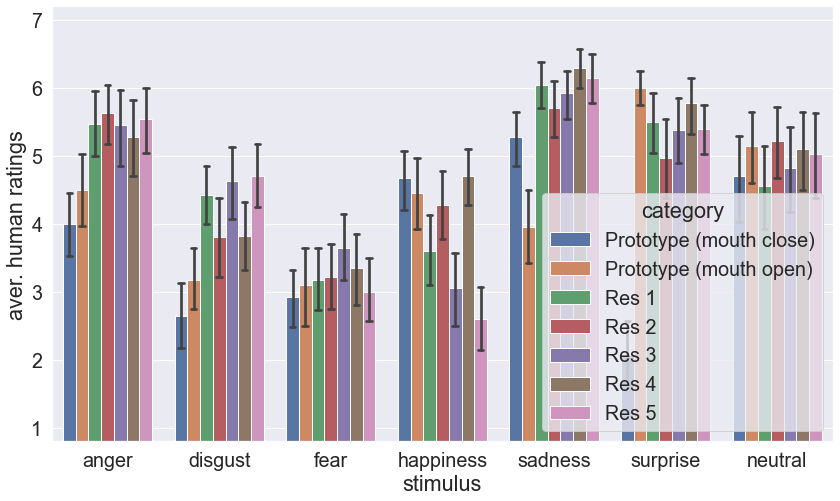

In [12]:
def multiple_analysis_with_fig(bar_group_num = 2):
#     emo_names = 'Anger*, Disgust*, Fear, Happiness*, Sadness*, Surprise*, Neutral'.lower().split(', ')
    emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
#     print(' Anger - 1 - 怒り,\n disgust 6 - 嫌悪,\n fear - 2 - 恐怖,\n happiness - 3 - 幸福, \n sadness - 4 - 悲しみ, \n surprise - 5 - 驚き,\n neutral - 7 - 中性')
#     print(total_data.iloc[0:2, :])
    df = []
    flag = True
    for i in range(7):
        current_emo = emo_names[i]
        print('current emo is ', current_emo)
        temp_data = total_data.iloc[:, 14+7*7*i : 14+7*7*i + 7*7].copy()
#         print(temp_data)
        temp_data_with_temp_rating = temp_data.iloc[:,[ get_emo_num(current_emo) + 7 * x for x in range(0, 7)]] # This line defined which data we use to generate the bar plot
#         print(temp_data_with_temp_rating.head())
        
        if flag:
#             print(type(df))
            df = pd.melt(temp_data_with_temp_rating, value_vars=list(temp_data_with_temp_rating.columns),
                     var_name='Stimulus', value_name='Aver. human ratings')
            df['emotion'] = current_emo
            flag = False
        else:
            temp_df = pd.melt(temp_data_with_temp_rating, value_vars=list(temp_data_with_temp_rating.columns),
                     var_name='Stimulus', value_name='Aver. human ratings')
            temp_df['emotion'] = current_emo
            df = pd.concat([df, temp_df], axis=0)
    
    category_list = []
    cate_ = ['Prototype (mouth close)', 'Prototype (mouth open)', 'Res 1', 'Res 2', 'Res 3', 'Res 4', 'Res 5']
    for i in range(7):
        for j in range(bar_group_num):
            for k in range(40):
                category_list.append(cate_[j])
    df['category']=category_list

    stim_name = [i for i in emo_names for _ in range(40 * bar_group_num)]
#     print(stim_name)
    df['Stimulus']=stim_name
    print(df)
    print(df.info())
    fig, ax = plt.subplots(figsize=(14, 8)) # set figure size
    fig.set_facecolor('white') # set background color
#         plt.xlabel('Stimulus')
#         plt.ylabel('Aver. human ratings')
    plt.xlim(-0.05, 1.05)
    plt.ylim(0.8, 7.2)
#         plt.title(current_emo, y=-0.12)
    plt.legend()
    print('error bar means  95% confidence interval')
    ax = sns.barplot(x="Stimulus", y="Aver. human ratings", hue='category',  data=df, estimator=np.mean, ci=95, capsize=.05)
    plt.show()
    fig.savefig('meanfor7.png', dpi=300)

multiple_analysis_with_fig(7)

# exp_result_data_normalized 2 columns

No handles with labels found to put in legend.


current emo is  anger
current emo is  disgust
current emo is  fear
current emo is  happiness
current emo is  sadness
current emo is  surprise
current emo is  neutral
   stimulus  aver. human ratings  emotion        category
0     anger                0.125    anger  Prototype_norm
1     anger                0.227    anger  Prototype_norm
2     anger                0.179    anger  Prototype_norm
3     anger                0.083    anger  Prototype_norm
4     anger                0.250    anger  Prototype_norm
..      ...                  ...      ...             ...
75  neutral                0.455  neutral      Res 1_norm
76  neutral                0.087  neutral      Res 1_norm
77  neutral                0.538  neutral      Res 1_norm
78  neutral                0.333  neutral      Res 1_norm
79  neutral                0.333  neutral      Res 1_norm

[560 rows x 4 columns]
error bar means  95% confidence interval


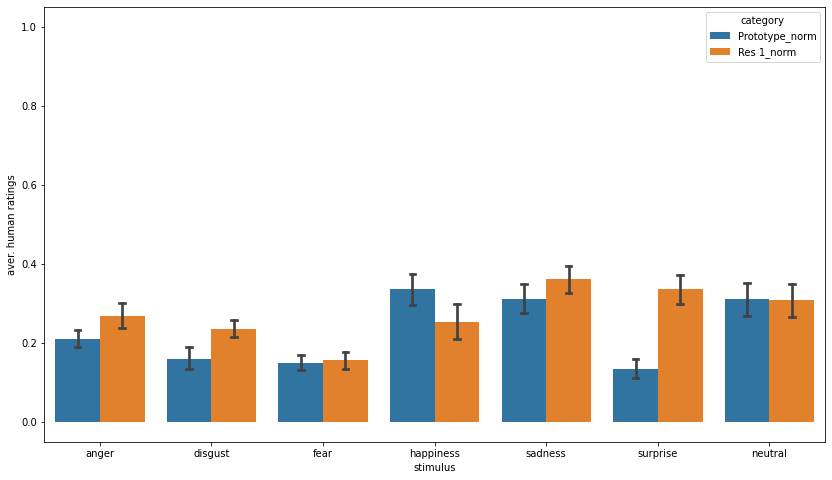

In [111]:
# def multiple_analysis_with_fig(bar_group_num = 2):
#     emo_names = 'Anger*, Disgust*, Fear, Happiness*, Sadness*, Surprise*, Neutral'.lower().split(', ')
bar_group_num = 2
emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
#     print(' Anger - 1 - 怒り,\n disgust 6 - 嫌悪,\n fear - 2 - 恐怖,\n happiness - 3 - 幸福, \n sadness - 4 - 悲しみ, \n surprise - 5 - 驚き,\n neutral - 7 - 中性')
#     print(total_data.iloc[0:2, :])
df = []
flag = True
for i in range(7):
    current_emo = emo_names[i]
    print('current emo is ', current_emo)
    temp_data = exp_result_data_normalized.iloc[:, 7*7*i : 7*7*i + 7*7].copy()
#         print(temp_data)
    temp_data_with_temp_rating = temp_data.iloc[:,[ get_emo_num(current_emo) + 7 * x for x in [0, 2]]] # This line defined which data we use to generate the bar plot
#     print(temp_data_with_temp_rating.head())
#     print(temp_data_with_temp_rating.info())

    if flag:
#             print(type(df))
        df = pd.melt(temp_data_with_temp_rating, value_vars=list(temp_data_with_temp_rating.columns),
                 var_name='Stimulus', value_name='Aver. human ratings')
        df['emotion'] = current_emo
        flag = False
    else:
        temp_df = pd.melt(temp_data_with_temp_rating, value_vars=list(temp_data_with_temp_rating.columns),
                 var_name='Stimulus', value_name='Aver. human ratings')
        temp_df['emotion'] = current_emo
        df = pd.concat([df, temp_df], axis=0)

category_list = []
cate_ = ['Prototype_norm', 'Res 1_norm']
for i in range(7):
    for j in range(bar_group_num):
        for k in range(40):
            category_list.append(cate_[j])
df['category']=category_list

stim_name = [i for i in emo_names for _ in range(40 * bar_group_num)]
#     print(stim_name)
df['Stimulus']=stim_name
print(df)
# print(df.info())
fig, ax = plt.subplots(figsize=(14, 8)) # set figure size
fig.set_facecolor('white') # set background color
#         plt.xlabel('Stimulus')
#         plt.ylabel('Aver. human ratings')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
#         plt.title(current_emo, y=-0.12)
plt.legend()
print('error bar means  95% confidence interval')
ax = sns.barplot(x="Stimulus", y="Aver. human ratings", hue='category',  data=df, estimator=np.mean, ci=95, capsize=.05)
plt.show()
fig.savefig('meanfor2_normalized.png', dpi=300)

# multiple_analysis_with_fig(7)

# exp_result_data_normalized 7 columns

No handles with labels found to put in legend.


current emo is  anger
current emo is  disgust
current emo is  fear
current emo is  happiness
current emo is  sadness
current emo is  surprise
current emo is  neutral
error bar means  95% confidence interval


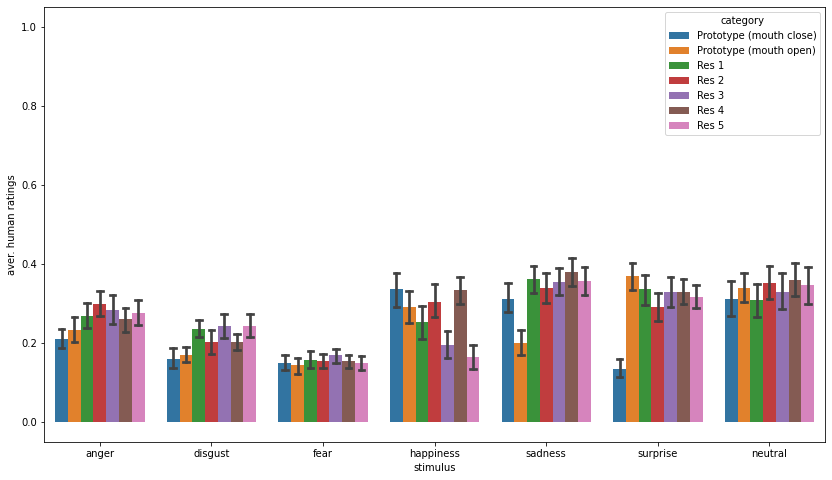

In [112]:
# def multiple_analysis_with_fig(bar_group_num = 2):
#     emo_names = 'Anger*, Disgust*, Fear, Happiness*, Sadness*, Surprise*, Neutral'.lower().split(', ')
bar_group_num = 7
emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
#     print(' Anger - 1 - 怒り,\n disgust 6 - 嫌悪,\n fear - 2 - 恐怖,\n happiness - 3 - 幸福, \n sadness - 4 - 悲しみ, \n surprise - 5 - 驚き,\n neutral - 7 - 中性')
#     print(total_data.iloc[0:2, :])
df = []
flag = True
for i in range(7):
    current_emo = emo_names[i]
    print('current emo is ', current_emo)
    temp_data = exp_result_data_normalized.iloc[:, 7*7*i : 7*7*i + 7*7].copy()
#         print(temp_data)
    temp_data_with_temp_rating = temp_data.iloc[:,[ get_emo_num(current_emo) + 7 * x for x in range(0, 7)]] # This line defined which data we use to generate the bar plot
#     print(temp_data_with_temp_rating.head())
#     print(temp_data_with_temp_rating.info())

    if flag:
#             print(type(df))
        df = pd.melt(temp_data_with_temp_rating, value_vars=list(temp_data_with_temp_rating.columns),
                 var_name='Stimulus', value_name='Aver. human ratings')
        df['emotion'] = current_emo
        flag = False
    else:
        temp_df = pd.melt(temp_data_with_temp_rating, value_vars=list(temp_data_with_temp_rating.columns),
                 var_name='Stimulus', value_name='Aver. human ratings')
        temp_df['emotion'] = current_emo
        df = pd.concat([df, temp_df], axis=0)

category_list = []
cate_ = ['Prototype (mouth close)', 'Prototype (mouth open)', 'Res 1', 'Res 2', 'Res 3', 'Res 4', 'Res 5']
for i in range(7):
    for j in range(bar_group_num):
        for k in range(40):
            category_list.append(cate_[j])
df['category']=category_list

stim_name = [i for i in emo_names for _ in range(40 * bar_group_num)]
#     print(stim_name)
df['Stimulus']=stim_name
# print(df)
# print(df.info())
fig, ax = plt.subplots(figsize=(14, 8)) # set figure size
fig.set_facecolor('white') # set background color
#         plt.xlabel('Stimulus')
#         plt.ylabel('Aver. human ratings')
plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
#         plt.title(current_emo, y=-0.12)
plt.legend()
print('error bar means  95% confidence interval')
ax = sns.barplot(x="Stimulus", y="Aver. human ratings", hue='category',  data=df, estimator=np.mean, ci=95, capsize=.05)
plt.show()
fig.savefig('meanfor7_normalized.png', dpi=300)

# multiple_analysis_with_fig(7)

# average_data 2 columns - selected

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


current emo is  anger
current emo is  disgust
current emo is  fear
current emo is  happiness
current emo is  sadness
current emo is  surprise
current emo is  neutral
error bar means  95% confidence interval


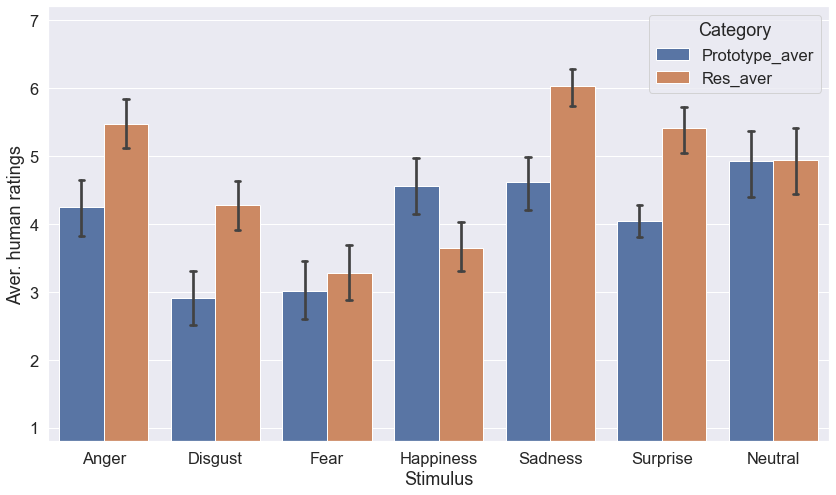

In [9]:
# def multiple_analysis_with_fig(bar_group_num = 2):
#     emo_names = 'Anger*, Disgust*, Fear, Happiness*, Sadness*, Surprise*, Neutral'.lower().split(', ')
bar_group_num = 2
emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
#     print(' Anger - 1 - 怒り,\n disgust 6 - 嫌悪,\n fear - 2 - 恐怖,\n happiness - 3 - 幸福, \n sadness - 4 - 悲しみ, \n surprise - 5 - 驚き,\n neutral - 7 - 中性')
#     print(total_data.iloc[0:2, :])
df = []
flag = True
for i in range(7):
    current_emo = emo_names[i]
    print('current emo is ', current_emo)
    temp_data = average_data.iloc[:, 2*7*i : 2*7*i + 2*7].copy()
#         print(temp_data)
    temp_data_with_temp_rating = temp_data.iloc[:,[ get_emo_num(current_emo) + 7 * x for x in [0, 1]]] # This line defined which data we use to generate the bar plot
#     print(temp_data_with_temp_rating.head())
#     print(temp_data_with_temp_rating.info())

    if flag:
#             print(type(df))
        df = pd.melt(temp_data_with_temp_rating, value_vars=list(temp_data_with_temp_rating.columns),
                 var_name='Stimulus', value_name='Aver. human ratings')
        df['emotion'] = current_emo
        flag = False
    else:
        temp_df = pd.melt(temp_data_with_temp_rating, value_vars=list(temp_data_with_temp_rating.columns),
                 var_name='Stimulus', value_name='Aver. human ratings')
        temp_df['emotion'] = current_emo
        df = pd.concat([df, temp_df], axis=0)

category_list = []
cate_ = ['Prototype_aver', 'Res_aver']
for i in range(7):
    for j in range(bar_group_num):
        for k in range(40):
            category_list.append(cate_[j])
df['Category']=category_list

stim_name = [i for i in form_names for _ in range(40 * bar_group_num)]
#     print(stim_name)
df['Stimulus']=stim_name
# print(df.iloc[360:420])
# print(df.info())
fig, ax = plt.subplots(figsize=(14, 8)) # set figure size
fig.set_facecolor('white') # set background color
#         plt.xlabel('Stimulus')
#         plt.ylabel('Aver. human ratings')
plt.xlim(-0.05, 1.05)
plt.ylim(0.8, 7.2)
#         plt.title(current_emo, y=-0.12)
plt.legend()
print('error bar means  95% confidence interval')
ax = sns.barplot(x="Stimulus", y="Aver. human ratings", hue='Category',  data=df, estimator=np.mean, ci=95, capsize=.05)
plt.show()
fig.savefig('meanfor_average_2.png', dpi=300)


# average_data 2 columns with norm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


current emo is  anger
current emo is  disgust
current emo is  fear
current emo is  happiness
current emo is  sadness
current emo is  surprise
current emo is  neutral
   Stimulus  Aver. human ratings  emotion             Category
0     Anger                0.129    anger  Prototype_aver_norm
1     Anger                0.150    anger  Prototype_aver_norm
2     Anger                0.172    anger  Prototype_aver_norm
3     Anger                0.100    anger  Prototype_aver_norm
4     Anger                0.208    anger  Prototype_aver_norm
..      ...                  ...      ...                  ...
75  Neutral                0.500  neutral        Res_aver_norm
76  Neutral                0.133  neutral        Res_aver_norm
77  Neutral                0.500  neutral        Res_aver_norm
78  Neutral                0.364  neutral        Res_aver_norm
79  Neutral                0.455  neutral        Res_aver_norm

[560 rows x 4 columns]
error bar means  95% confidence interval


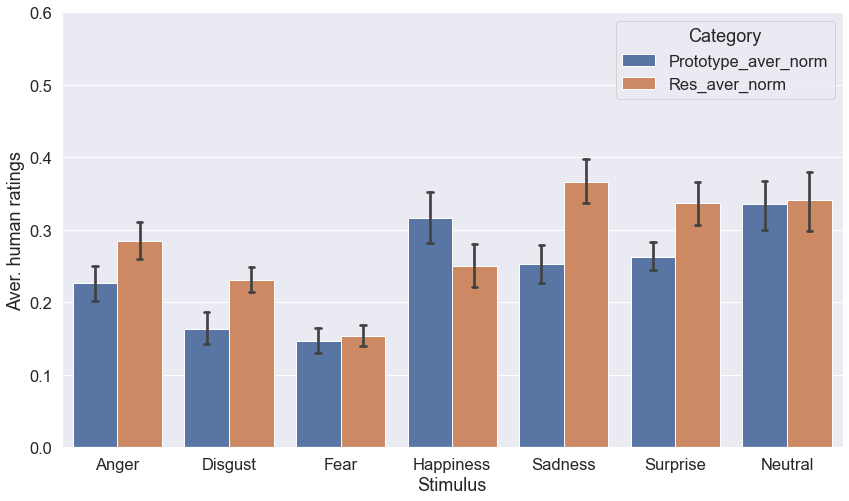

In [10]:
# def multiple_analysis_with_fig(bar_group_num = 2):
#     emo_names = 'Anger*, Disgust*, Fear, Happiness*, Sadness*, Surprise*, Neutral'.lower().split(', ')
bar_group_num = 2
emo_names = 'Anger, Disgust, Fear, Happiness, Sadness, Surprise, Neutral'.lower().split(', ')
#     print(' Anger - 1 - 怒り,\n disgust 6 - 嫌悪,\n fear - 2 - 恐怖,\n happiness - 3 - 幸福, \n sadness - 4 - 悲しみ, \n surprise - 5 - 驚き,\n neutral - 7 - 中性')
#     print(total_data.iloc[0:2, :])
df = []
flag = True
for i in range(7):
    current_emo = emo_names[i]
    print('current emo is ', current_emo)
    temp_data = average_data_norm.iloc[:, 2*7*i : 2*7*i + 2*7].copy()
#         print(temp_data)
    temp_data_with_temp_rating = temp_data.iloc[:,[ get_emo_num(current_emo) + 7 * x for x in range(0, 2)]] # This line defined which data we use to generate the bar plot
#     print(temp_data_with_temp_rating.head())
#     print(temp_data_with_temp_rating.info())

    if flag:
#             print(type(df))
        df = pd.melt(temp_data_with_temp_rating, value_vars=list(temp_data_with_temp_rating.columns),
                 var_name='Stimulus', value_name='Aver. human ratings')
        df['emotion'] = current_emo
        flag = False
    else:
        temp_df = pd.melt(temp_data_with_temp_rating, value_vars=list(temp_data_with_temp_rating.columns),
                 var_name='Stimulus', value_name='Aver. human ratings')
        temp_df['emotion'] = current_emo
        df = pd.concat([df, temp_df], axis=0)

category_list = []
cate_ = ['Prototype_aver_norm', 'Res_aver_norm']
for i in range(7):
    for j in range(bar_group_num):
        for k in range(40):
            category_list.append(cate_[j])
df['Category']=category_list

stim_name = [i for i in form_names for _ in range(40 * bar_group_num)]
#     print(stim_name)
df['Stimulus']=stim_name
print(df)
# print(df.info())
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(14, 8)) # set figure size
fig.set_facecolor('white') # set background color
#         plt.xlabel('Stimulus')
#         plt.ylabel('Aver. human ratings')
plt.xlim(-0.05, 1.05)
plt.ylim(0.0, 0.6)
#         plt.title(current_emo, y=-0.12)
plt.legend()
print('error bar means  95% confidence interval')
ax = sns.barplot(x="Stimulus", y="Aver. human ratings", hue='Category',  data=df, estimator=np.mean, ci=95, capsize=.05)
plt.show()
fig.savefig('meanfor_average_2_normalized.png', dpi=300)
